In [13]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [7]:
 !pip install pyrotd

  Created wheel for pyrotd: filename=pyrotd-0.5.4-py2.py3-none-any.whl size=7723 sha256=c425a81cf547ea688b2ea298f4d1a34627ae74d552d73095592e2895a71bb0a2
  Stored in directory: /root/.cache/pip/wheels/af/43/cf/f3bac100ae061c2475c0187cf55ee0a041735410f5656b6c0c
Successfully built pyrotd


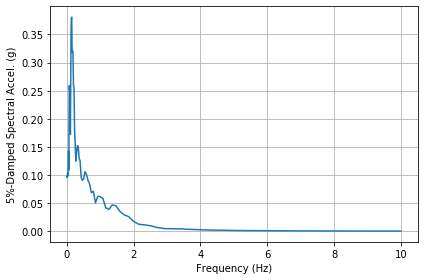

In [28]:
import os

import matplotlib.pyplot as plt
import numpy as np

import pyrotd
pyrotd.processes = 1

# Load the AT2 timeseries
# download these sample files https://github.com/arkottke/pyrotd/tree/master/examples/data and upload them to your Drive
fname = os.path.join('/content/drive/My Drive/course/RSN8883_14383980_13849090.AT2')
fname
with open(fname) as fp:
    for _ in range(3):
        next(fp)
    line = next(fp)
    time_step = float(line[17:25])
    accels = np.array([p for l in fp for p in l.split()]).astype(float)
accels
# Compute the acceleration response spectrum
osc_damping = 0.05
osc_freqs = np.logspace(-1, 2, 91)
resp_spec = pyrotd.calc_spec_accels(time_step, accels, osc_freqs, osc_damping)

# Create a plot!
fig, ax = plt.subplots()

ax.plot(1/resp_spec.osc_freq, resp_spec.spec_accel)

ax.set(
    xlabel='Frequency (Hz)',
    #xscale='log',
    ylabel='5%-Damped Spectral Accel. (g)',)
    #yscale='log', )
ax.grid()
fig.tight_layout()
plt.show(fig)